<a href="https://colab.research.google.com/github/nikhilsingh-hub/Covid-19-predictor/blob/main/CNN_XRAYs95_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from PIL.Image import fromarray
import matplotlib.pyplot as plt


In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import tensorflow as tf
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv3D,Conv2D, MaxPooling2D,TimeDistributed,LSTM,ConvLSTM2D
from keras.utils import np_utils

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
import os
from keras.preprocessing.image import img_to_array


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
paths=['/content/drive/MyDrive/xray/normal',
       '/content/drive/MyDrive/xray/covid']

In [ ]:
A = []
B=  []

for label, path in  enumerate(paths):
    for img_path in os.listdir(path):
        A.append(img_to_array(fromarray(cv2.resize(cv2.imread(os.path.join(path, img_path), cv2.IMREAD_GRAYSCALE), (256,256)))))
        B.append(label)

A = np.array(A)
B = np.array(B)

In [ ]:
A /= 255.0

In [ ]:
print(A.shape)
print(B.shape)

(4648, 256, 256, 1)
(4648,)


In [ ]:
import seaborn as sns
import pandas as pd
from keras.preprocessing.image import array_to_img

In [ ]:
pd.DataFrame({'id':B})

,id
0,0
1,0
2,0
3,0
4,0
...,...
4643,1
4644,1
4645,1
4646,1


Text(0.5, 1.0, 'Freq of covid patients |  freq of non-covid patients')

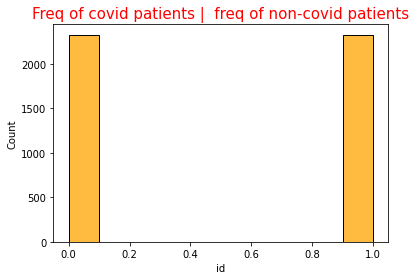

In [ ]:
sns.histplot(pd.DataFrame({'id' : B}), x = 'id',binwidth = 0.1,color='orange')
plt.title('Freq of covid patients |  freq of non-covid patients', fontsize = 15 , color ='red')

In [ ]:
info = {
    0 : 'Non Covid Scan',
    1 : 'Covid Scan'}

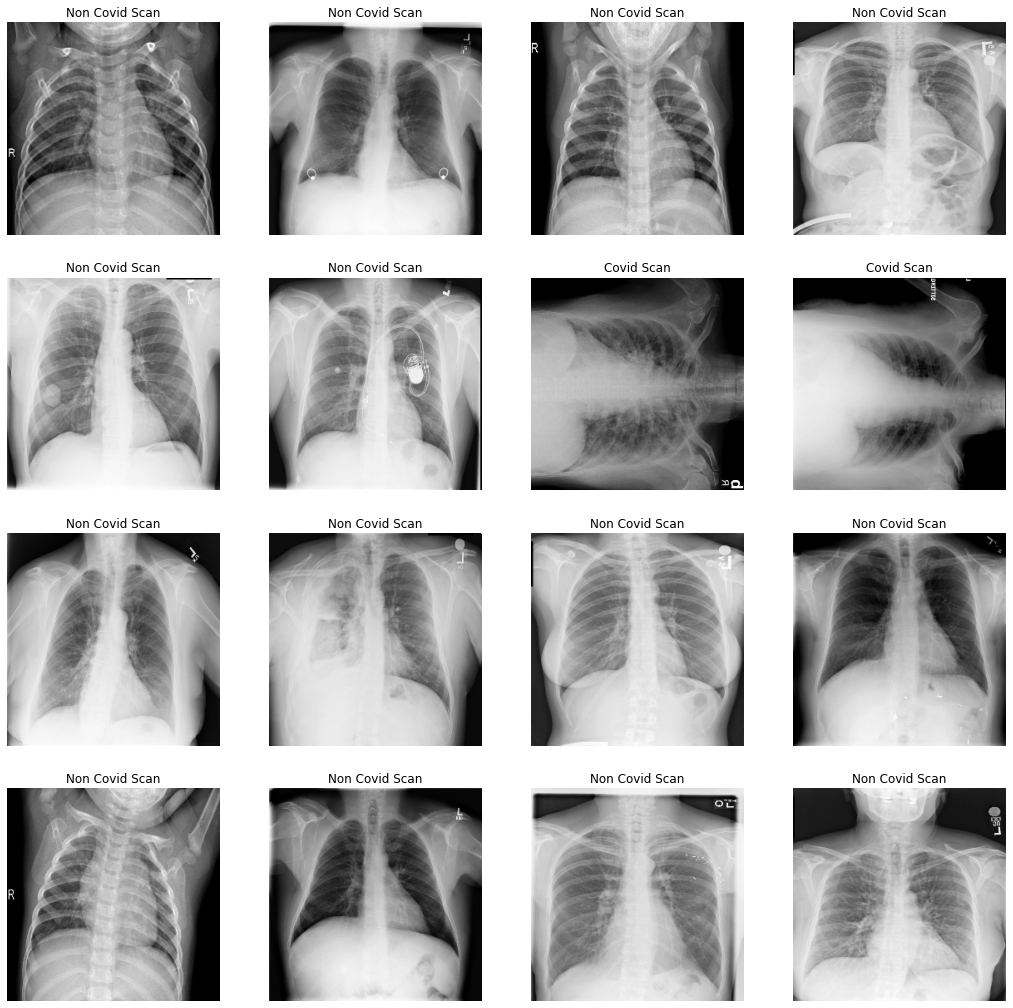

In [ ]:
plt.figure(figsize = (18,18))

i = 0

while i < 16 :

    x = np.random.randint(0, 2481)
    plt.subplot(4, 4, i + 1)
    plt.imshow(array_to_img(A[x]), 'gray')
    plt.title(info[B[x]])
    plt.axis('off')

    i += 1
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = .1, random_state = 1)

In [ ]:
print(A_train.shape)
print(B_train.shape)

(4183, 256, 256, 1)
(4183,)


In [ ]:
print(A_test.shape)
print(B_test.shape)

(465, 256, 256, 1)
(465,)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
for_train = ImageDataGenerator(rotation_range = 5, zoom_range = [0.9, 1.2], horizontal_flip = True,
                               height_shift_range = [-5,5], width_shift_range = [-5,5])

In [ ]:
for_train.fit(A_train)

In [ ]:
pointer = for_train.flow(A_train, B_train)

In [ ]:
a, b = pointer.next()

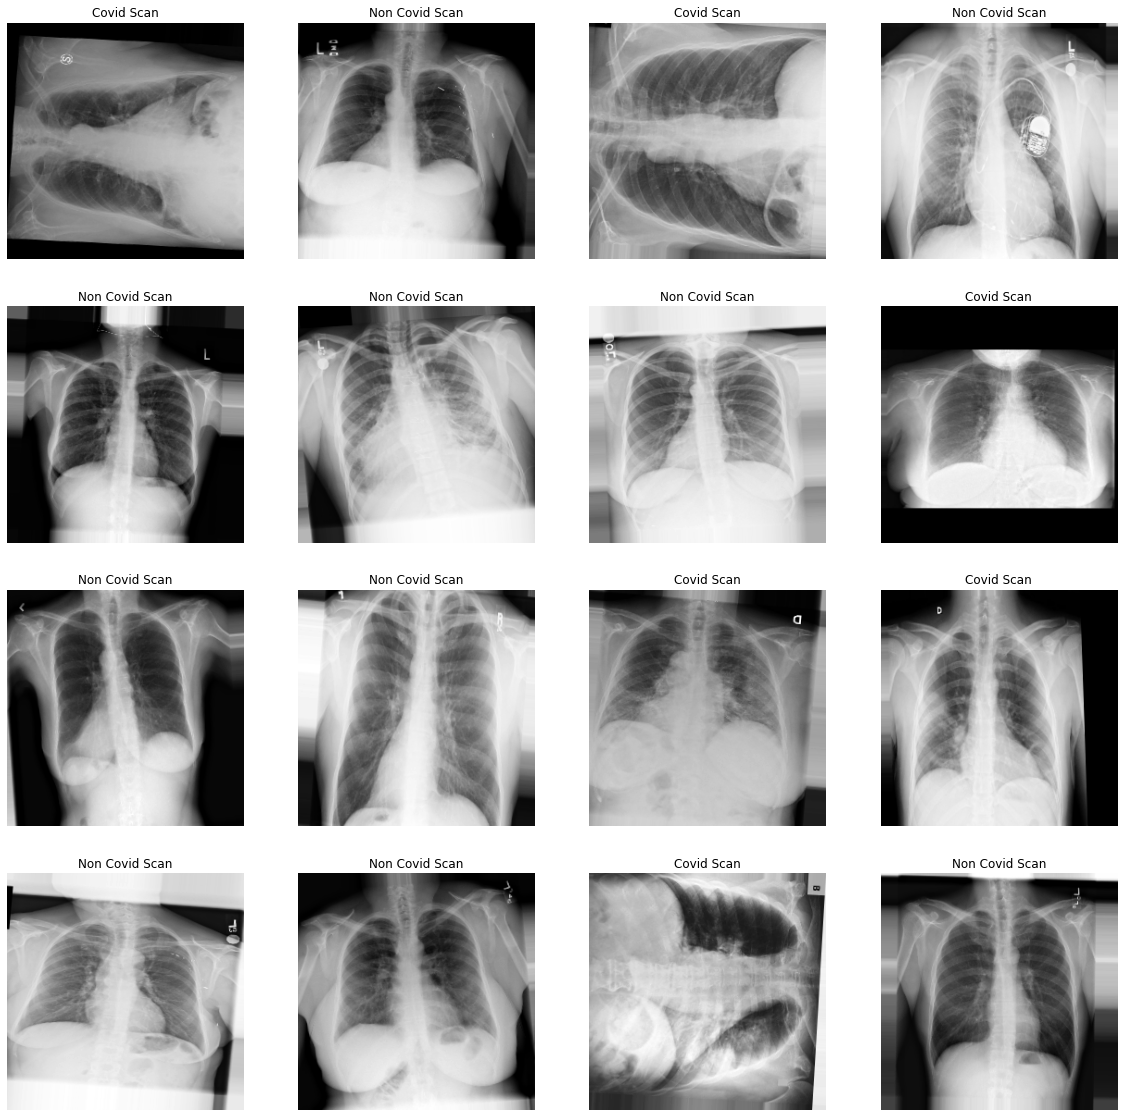

In [ ]:
plt.figure(figsize = (20,20))

i = 0

while i < 16 :

    plt.subplot(4, 4, i + 1)
    plt.imshow(array_to_img(a[i]), 'gray')
    plt.title(info[b[i]])
    plt.axis('off')

    i += 1
plt.show()

In [ ]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

In [ ]:
def create_model():
    model = Sequential()
    model.add(layers.Input((256,256,1)))
    model.add(layers.Conv2D(32, (3,3), padding = 'same', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))

    model.add(layers.Conv2D(64, (3,3)))
    model.add(BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))

    model.add(layers.Conv2D(128, (3,3)))
    model.add(layers.LeakyReLU())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(.2))

    model.add(layers.Flatten())

    model.add(layers.Dense(64, kernel_regularizer = 'l2'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(.2))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    return model

model = create_model()

model.summary()







Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_3 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 64)     

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      320       
                                                                 
 batch_normalization_3 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 126, 126, 64)     

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.0005), metrics = ['accuracy'])

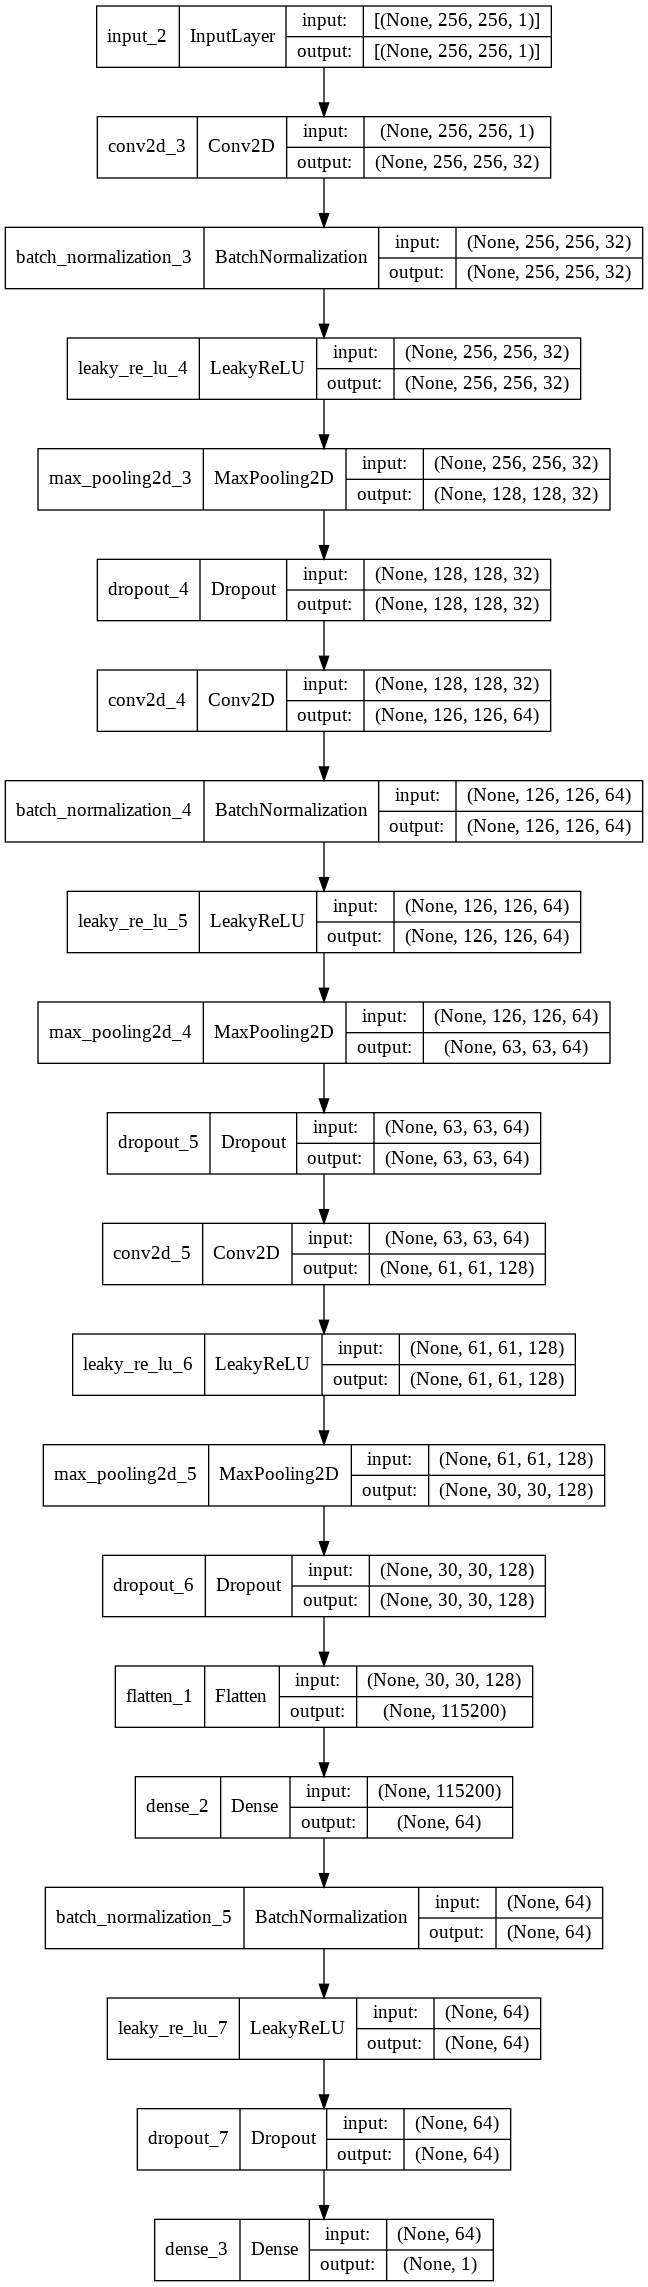

In [ ]:
tf.keras.utils.plot_model(model, './covid_model.png', show_shapes = True)

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
checkp = ModelCheckpoint('./covid-model.h5', save_best_only = True, monitor = 'val_loss', verbose = 1)

In [ ]:
history = model.fit(for_train.flow(A_train, B_train, batch_size = 64), epochs = 48,
                    validation_data = (A_test, B_test), callbacks = [checkp])

Epoch 1/48
66/66 [==============================] - ETA: 0s - loss: 1.3755 - accuracy: 0.8097
Epoch 00001: val_loss improved from inf to 1.88764, saving model to ./covid-model.h5
66/66 [==============================] - 25s 343ms/step - loss: 1.3755 - accuracy: 0.8097 - val_loss: 1.8876 - val_accuracy: 0.5226
Epoch 2/48
66/66 [==============================] - ETA: 0s - loss: 0.6363 - accuracy: 0.8668
Epoch 00002: val_loss improved from 1.88764 to 1.81316, saving model to ./covid-model.h5
66/66 [==============================] - 23s 350ms/step - loss: 0.6363 - accuracy: 0.8668 - val_loss: 1.8132 - val_accuracy: 0.5226
Epoch 3/48
66/66 [==============================] - ETA: 0s - loss: 0.5091 - accuracy: 0.8817
Epoch 00003: val_loss did not improve from 1.81316
66/66 [==============================] - 22s 333ms/step - loss: 0.5091 - accuracy: 0.8817 - val_loss: 2.2083 - val_accuracy: 0.5226
Epoch 4/48
66/66 [==============================] - ETA: 0s - loss: 0.4518 - accuracy: 0.8946
Epo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = keras.models.load_model('./covid-model.h5')

In [ ]:
B_pred = model.predict(A_test, verbose = 1)


15/15 [==============================] - 1s 32ms/step


In [ ]:
B_pred = np.around(B_pred)

In [ ]:
print(f'Number of 0 labels in test dataset : {B_test[B_test == 0].shape[0]}')
print(f'Number of 1 labels in test dataset : {B_test[B_test == 1].shape[0]}')

Number of 0 labels in test dataset : 222
Number of 1 labels in test dataset : 243


In [ ]:
print(f'Number of 0 labels in pred dataset : {B_pred[B_pred == 0].shape[0]}')
print(f'Number of 1 labels in pred dataset : {B_pred[B_pred == 1].shape[0]}')

Number of 0 labels in pred dataset : 244
Number of 1 labels in pred dataset : 221


In [ ]:
print(classification_report(B_test, B_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       222
           1       1.00      0.91      0.95       243

    accuracy                           0.95       465
   macro avg       0.95      0.95      0.95       465
weighted avg       0.96      0.95      0.95       465



In [ ]:
print(f"Loss: {history.history['loss'][-1]}")
print(f"accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")

Loss: 0.3680564761161804
accuracy: 0.9469280242919922
Validation accuracy: 0.7612903118133545


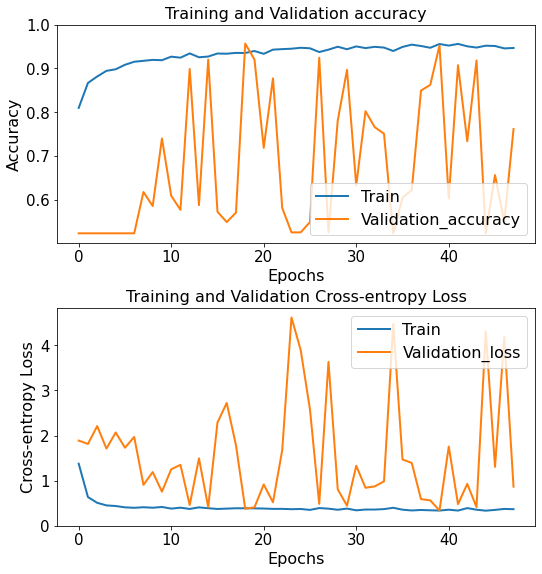

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.tight_layout(pad=2.0)
plt.plot(acc, label='Train' , linewidth = 2)
plt.plot(val_acc, label='Validation_accuracy', linewidth = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation accuracy', fontsize=16)

plt.subplot(2, 1, 2)
plt.tight_layout(pad=2.0)
plt.plot(loss, label='Train', linewidth = 2)
plt.plot(val_loss, label='Validation_loss', linewidth = 2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-entropy Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-entropy Loss', fontsize=16)
plt.show()

In [ ]:
cm = confusion_matrix(B_test, B_pred,normalize='true')
disease_types = ['Covid','non-Covid']

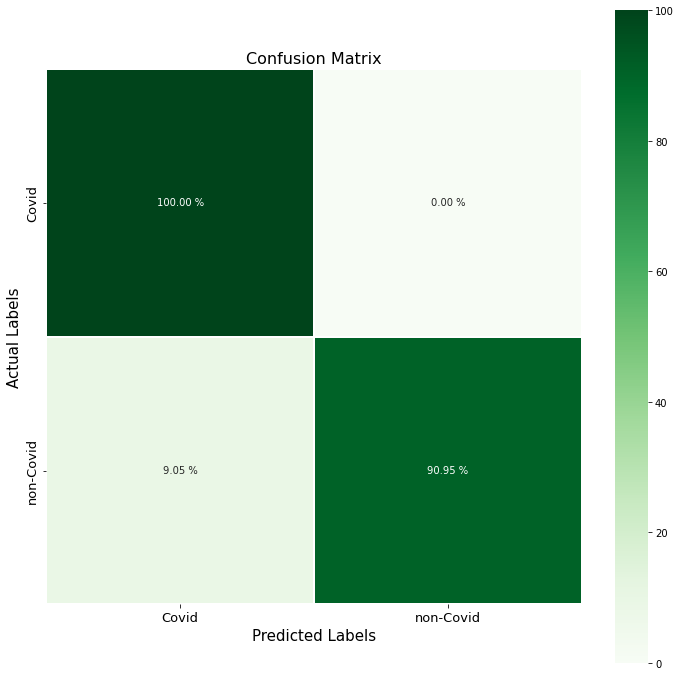

In [ ]:
plt.figure(figsize = (12,12))
ax = sns.heatmap(cm*100, cmap=plt.cm.Greens,linecolor='white',linewidths=1,annot=True, fmt='.2f',square=True, xticklabels = disease_types, yticklabels=disease_types)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.title('Confusion Matrix',fontsize = 16)
plt.ylabel('Actual Labels',fontsize = 15)
plt.xlabel('Predicted Labels', fontsize = 15)
plt.yticks(verticalalignment = 'center')
ax.xaxis.set_ticklabels(disease_types,fontsize = 13); ax.yaxis.set_ticklabels(disease_types,fontsize = 13)
plt.show()